<a href="https://colab.research.google.com/github/Dpgofast/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Dakota_DS1_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

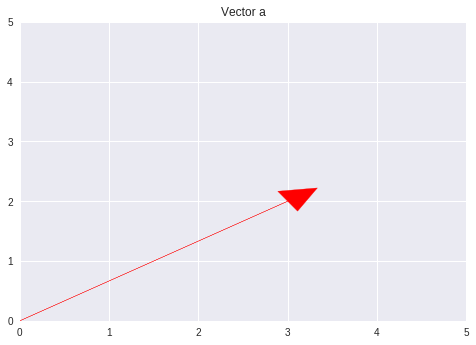

In [27]:
plt.arrow(0,0,3,2, head_width = .4, head_length = .4, color= 'r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Vector a");

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [10]:
b= np.array([17,-4,-2,1])
b_norm = np.linalg.norm(b)
print('Norm of vector B:\n',b_norm)
print('The norm of a vector represents the magnitude or extent of the vector in space')

Norm of vector B:
 17.60681686165901
The norm of a vector represents the magnitude or extent of the vector in space


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [13]:
c= np.array([3,7,-2,12])
d= np.array([9,-7,4,6])
cd = np.dot(c,d)
print('C dot D :\n',cd)

C dot D :
 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [17]:
E = np.mat('7,4,2;1,3,-1;2,6,-4')
invE = np.linalg.inv(E)
Etrans = E.T
print('Inverse of E is:\n',invE)
print('Transpose of E :\n',Etrans)

Inverse of E is:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transpose of E :
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [31]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


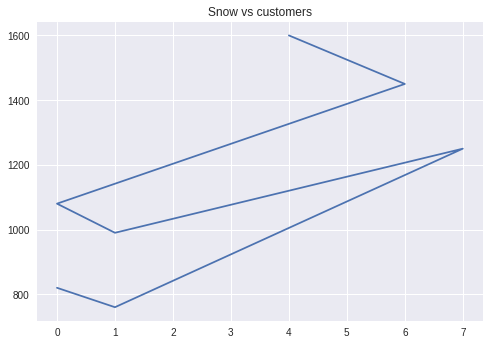

In [61]:
plt.plot(df['snow'],df['customers'])
plt.title('Snow vs customers');

In [67]:
##### Your Code Here #####
print('Mean:\n',df.describe().mean())
print('Standard deviation:\n',df.describe().std())# this std differs from the one above?
print('Standard deviation round 2:\n',np.std(df,ddof=1))
print('Variance:\n',np.var(df,ddof = 1))

Mean:
 customers    893.997294
snow           3.267748
dtype: float64
Standard deviation:
 customers    526.488848
snow           2.797023
dtype: float64
Standard deviation round 2:
 customers    314.264069
snow           2.927700
dtype: float64
Variance:
 customers    98761.904762
snow             8.571429
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [69]:
print('customer variance \n',np.var(df['customers'],ddof=1))
print('Snow variance\n',np.var(df['snow'],ddof = 1))
print('The variances do not look comparable to me')

customer variance 
 98761.90476190478
Snow variance
 8.571428571428571
The variances do not look comparable to me


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [70]:
print('Variance covariance matrix:\n',df.cov())

Variance covariance matrix:
               customers        snow
customers  98761.904762  670.238095
snow         670.238095    8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [72]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [73]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [143]:
##### Your Code Here #####
 from sklearn.preprocessing import StandardScaler
data = X
 scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
X2 =pd.DataFrame(scaler.transform(data), columns = X.columns)
X2.describe()

StandardScaler(copy=True, with_mean=True, with_std=True)
[4.6629367e-17 8.8817842e-18]


,x,y
count,2.000000e+02,2.000000e+02
mean,1.776357e-17,8.881784e-18
std,1.002509e+00,1.002509e+00
min,-1.715069e+00,-1.378308e+00
25%,-5.052073e-01,-8.665439e-01
50%,-2.311267e-01,-3.385765e-01
75%,4.171789e-01,1.218429e+00
max,2.229030e+00,1.671647e+00


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

[0.68327871 0.24871288]
[6.81637385 4.1124781 ]


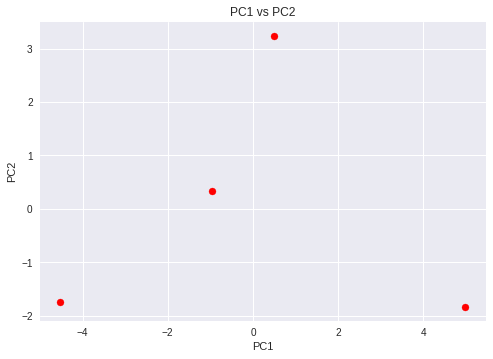

In [95]:
##### Your Code Here #####
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)  
x3 = pd.DataFrame(pca.transform(X2),columns =['PC1','PC2'])
plt.scatter(x3['PC1'],x3['PC2'],color = 'r')
plt.title('PC1 vs PC2');
plt.xlabel('PC1')
plt.ylabel('PC2');

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [97]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
#print(numpy_points)

In [99]:
##### Your Code Here #####
 from sklearn.preprocessing import StandardScaler
data = points
 scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
scale_point=pd.DataFrame(scaler.transform(data), columns = points.columns)
scale_point.head()

StandardScaler(copy=True, with_mean=True, with_std=True)
[-2.32329816 -3.42286901]


,x,y
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


In [129]:
from sklearn.cluster import KMeans
X = scale_point
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
clus = pd.DataFrame(kmeans.fit_transform(X), columns = scale_point.columns)
clus.head()

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1
 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1]
[[ 0.80294941  1.33141448]
 [-0.39548255 -0.65577131]]


,x,y
0,2.417662,1.049977
1,2.228975,0.129167
2,2.476443,0.982140
3,2.372675,0.601800
4,2.504045,0.869419


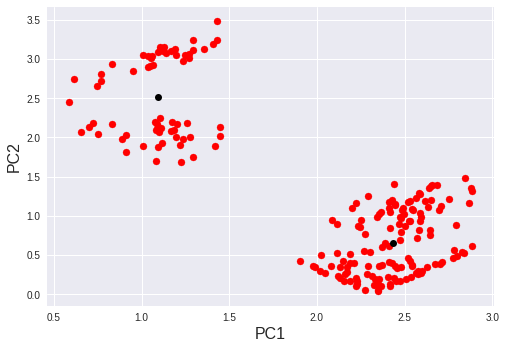

In [142]:
colors =['r']
centers = kmeans.cluster_centers_
plt.scatter(clus['x'],clus['y'],c=colors )
for cent in centro.iterrows():
    plt.plot(cent[1][0], cent[1][1], "ok")

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.show()

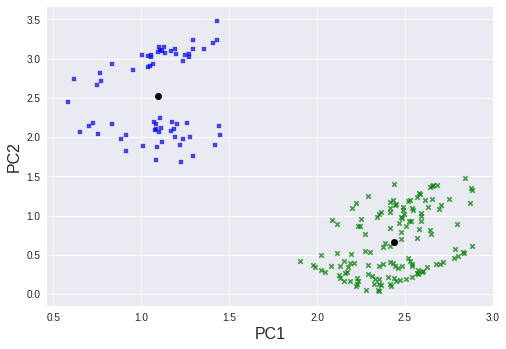

In [141]:
from mlxtend.plotting import category_scatter
clus['cluster'] = kmeans.labels_
centro = clus.groupby('cluster').mean()

fig = category_scatter(data=clus,
                       x = 'x', 
                       y = 'y', 
                       label_col = 'cluster', legend_loc=False)

for cent in centro.iterrows():
    plt.plot(cent[1][0], cent[1][1], "ok")

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.show()